In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('superstore.csv')

In [ ]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.isnull().sum()

,0
row_id,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7862 entries, 0 to 7861
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         7862 non-null   int64  
 1   order_id       7862 non-null   object 
 2   order_date     7862 non-null   object 
 3   ship_date      7862 non-null   object 
 4   ship_mode      7862 non-null   object 
 5   customer_id    7862 non-null   object 
 6   customer_name  7862 non-null   object 
 7   segment        7862 non-null   object 
 8   country        7862 non-null   object 
 9   city           7862 non-null   object 
 10  state          7862 non-null   object 
 11  postal_code    7862 non-null   int64  
 12  region         7862 non-null   object 
 13  product_id     7862 non-null   object 
 14  category       7862 non-null   object 
 15  subcategory    7862 non-null   object 
 16  product_name   7862 non-null   object 
 17  sales          7862 non-null   float64
 18  quantity     

In [ ]:
df.describe()

,row_id,postal_code,sales,quantity,discount,profit
count,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000,7862.000000
mean,3931.535614,55125.850547,230.605211,3.785932,0.152081,28.320970
std,2269.771028,32041.543773,623.908145,2.212152,0.203423,227.825906
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,1966.250000,22980.000000,17.430000,2.000000,0.000000,1.862700
50%,3931.500000,55407.000000,54.514000,3.000000,0.150000,8.811900
75%,5896.750000,90007.000000,212.033500,5.000000,0.200000,30.009300
max,8018.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [ ]:
df = df.sort_values('order_date')

In [ ]:
print(f"Data ready! Total months detected: {len(monthly_sales)}")
print(monthly_sales.head())
print("-" * 50)

Data ready! Total months detected: 48
order_date
2014-01-01    14236.895
2014-02-01     4519.892
2014-03-01    55691.009
2014-04-01    28295.345
2014-05-01    23648.287
Freq: MS, Name: sales, dtype: float64
--------------------------------------------------


 EDA & DECOMPOSITION

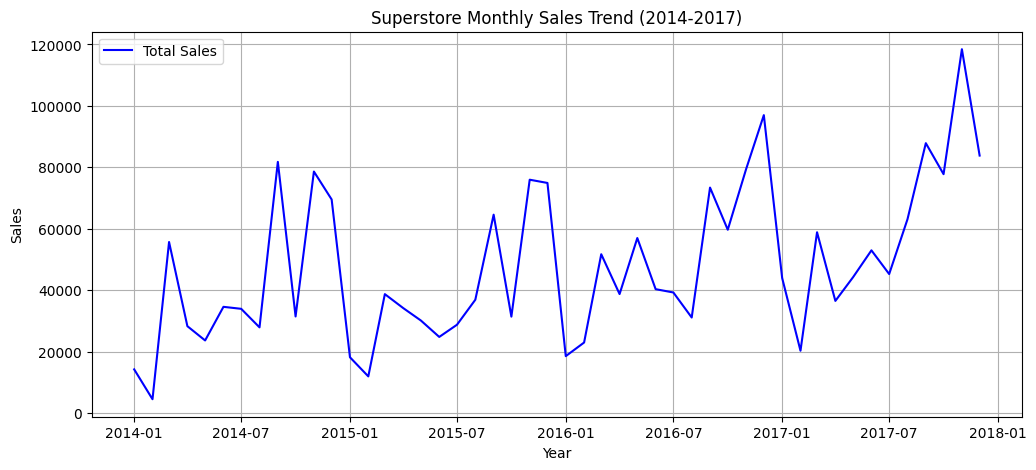

In [ ]:
# Plot Original Data (Monthly Sales)
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index, monthly_sales, label='Total Sales', color='blue')
plt.title('Superstore Monthly Sales Trend (2014-2017)')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

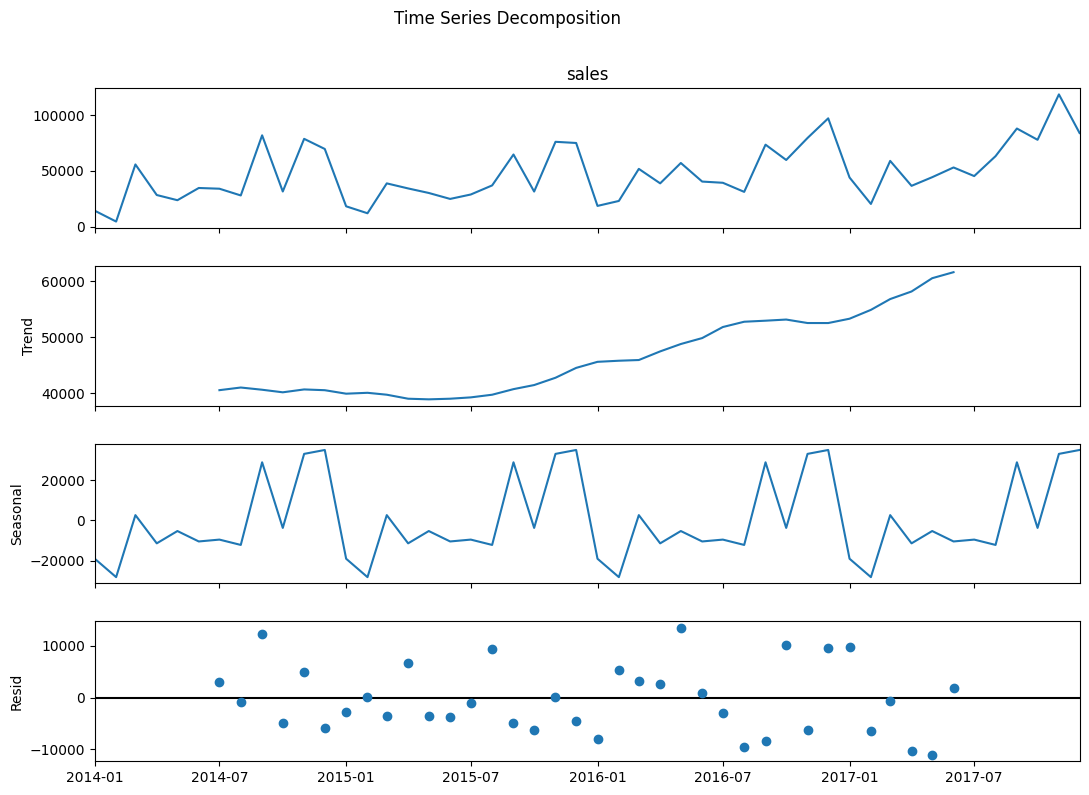

In [ ]:
# Decomposition (Trend, Seasonal, Residual)
decomposition = seasonal_decompose(monthly_sales, model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Time Series Decomposition', y=1.02)
plt.show()

SMOOTHING (MOVING AVERAGE & EKSPONENTIAL)

In [ ]:
# a. Simple Moving Average (SMA) - 3 Month Window
sma_3 = monthly_sales.rolling(window=3).mean()

In [ ]:
# b. Exponential Smoothing
# Using trend='add' and seasonal='add' with a 12-month period
es_model = ExponentialSmoothing(
    monthly_sales,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()
es_fitted = es_model.fittedvalues

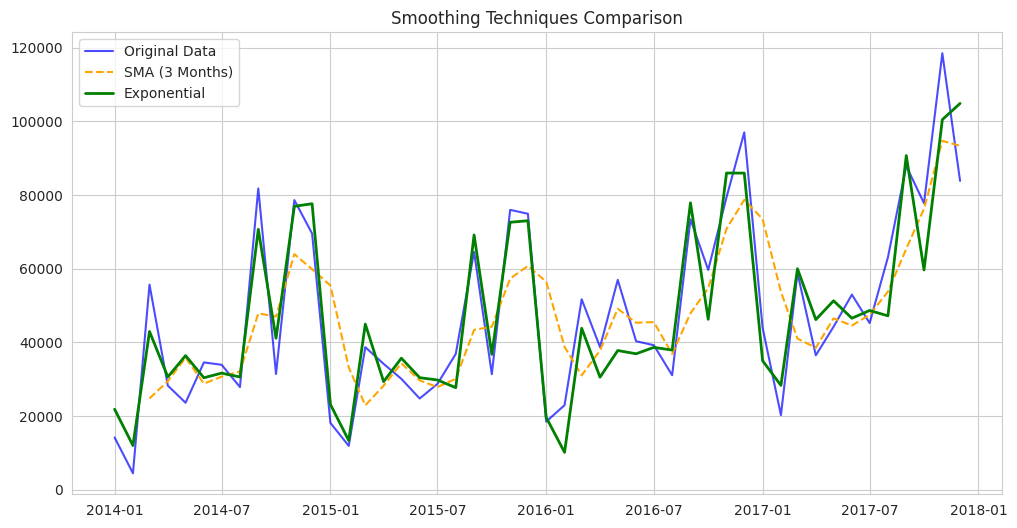

In [ ]:
# Visualization Comparison
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Original Data', color='blue', alpha=0.7)
plt.plot(sma_3, label='SMA (3 Months)', color='orange', linestyle='--')
plt.plot(es_fitted, label='Holt-Winters', color='green', linewidth=2)
plt.title('Smoothing Techniques Comparison')
plt.legend()
plt.grid(True)
plt.show()

MODELING (SARIMA) & FORECASTING

In [ ]:
# Split Data: Train (80%) and Test (20%)
train_size = int(len(monthly_sales) * 0.8)
train_data, test_data = monthly_sales.iloc[:train_size], monthly_sales.iloc[train_size:]

In [ ]:
# Define SARIMA Model (Seasonal ARIMA)
# Order (p,d,q) = (1,1,1) -> Standard ARIMA components
# Seasonal Order (P,D,Q,s) = (1,1,1,12) -> Seasonal components (12 = yearly cycle)
model = SARIMAX(train_data,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

In [ ]:
# Train the Model
model_fit = model.fit(disp=False)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# Perform Forecasting on the Test data range
forecast_result = model_fit.get_forecast(steps=len(test_data))
predicted_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int() # 95% Confidence Interval

 EVALUATION & VISUALIZATION


In [ ]:
import matplotlib.dates as mdates

In [ ]:
# RMSE calculation
rmse = np.sqrt(mean_squared_error(test_data, predicted_mean))
print(f"ROOT MEAN SQUARED ERROR (RMSE): {rmse:.2f}")

ROOT MEAN SQUARED ERROR (RMSE): 15846.78


In [ ]:
# Setup Style Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

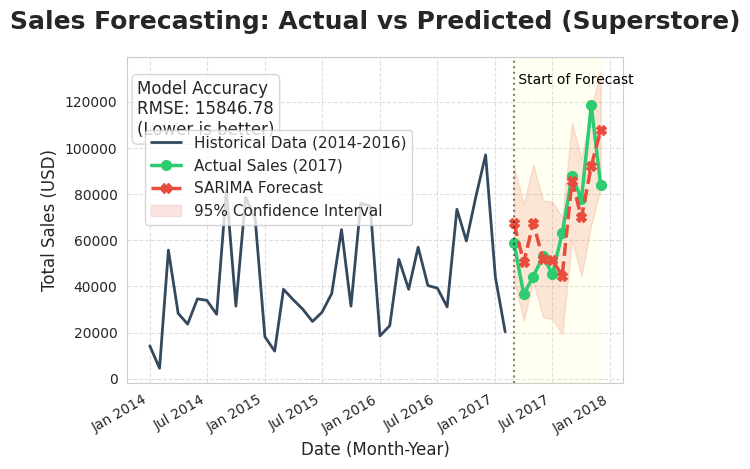

In [ ]:
# Plotting Data
# 1. Historical Data (Training)
plt.plot(train_data.index, train_data,
         label='Historical Data (2014-2016)',
         color='#34495e',
         linewidth=2)

# 2. Actual Data (Test)
plt.plot(test_data.index, test_data,
         label='Actual Sales (2017)',
         color='#2ecc71',
         linewidth=2.5,
         marker='o', markersize=7)

# 3. Prediction Data (Forecast)
plt.plot(predicted_mean.index, predicted_mean,
         label='SARIMA Forecast',
         color='#e74c3c',
         linestyle='--',
         linewidth=2.5,
         marker='X', markersize=7)

# 4. Confidence Interval
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='#e74c3c', alpha=0.15,
                 label='95% Confidence Interval')

forecast_start = test_data.index[0]
plt.axvline(forecast_start, color='black', linestyle=':', alpha=0.5)
plt.text(forecast_start, plt.ylim()[1]*0.95, ' Start of Forecast',
         color='black', fontsize=10, verticalalignment='top')

# Highlight Background Area Prediksi
plt.axvspan(forecast_start, test_data.index[-1], color='yellow', alpha=0.05)

info_text = f'Model Accuracy\nRMSE: {rmse:.2f}\n(Lower is better)'
plt.text(0.02, 0.93, info_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='lightgray'))

plt.title('Sales Forecasting: Actual vs Predicted (Superstore)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date (Month-Year)', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.02, 0.80), fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()